In [35]:
import ast
import numpy as np
import pandas as pd

results = pd.read_csv('results.csv')
results['board'] = results['board'].apply(ast.literal_eval)
results['board'] = results['board'].apply(np.array)
results.head()

,num_attacks,board
0,57,"[[None, None, None, None, None, None, None, No..."
1,26,"[[None, None, None, None, None, None, None, No..."
2,42,"[[None, None, None, None, None, None, Cruiser,..."
3,46,"[[None, None, None, None, None, None, None, No..."
4,53,"[[None, None, None, None, None, None, None, No..."


In [36]:
difficult_boards = results.sort_values('num_attacks').tail()['board']
print('Difficult Boards:\n')
for board in difficult_boards:
    for col in board:
        print(col)
    print()

Difficult Boards:

[None None None None None None None None None None]
[None None None None None None None None None None]
[None 'Cruiser' 'Cruiser' 'Cruiser' None None None None None None]
[None None None None None None None None None None]
[None None None None None None None None None None]
['Destroyer' None None None None None None None None None]
['Destroyer' None None None None None None None None None]
[None None None 'Aircraft_Carrier' 'Aircraft_Carrier' 'Aircraft_Carrier'
 'Aircraft_Carrier' 'Aircraft_Carrier' None None]
[None None None 'Submarine' 'Submarine' 'Submarine' None None None None]
['Battleship' 'Battleship' 'Battleship' 'Battleship' None None None None
 None None]

[None None None None None None None None None None]
[None None None None None None 'Battleship' 'Battleship' 'Battleship'
 'Battleship']
[None None None 'Aircraft_Carrier' 'Aircraft_Carrier' 'Aircraft_Carrier'
 'Aircraft_Carrier' 'Aircraft_Carrier' None None]
[None None None None None None None None None 

42.4434

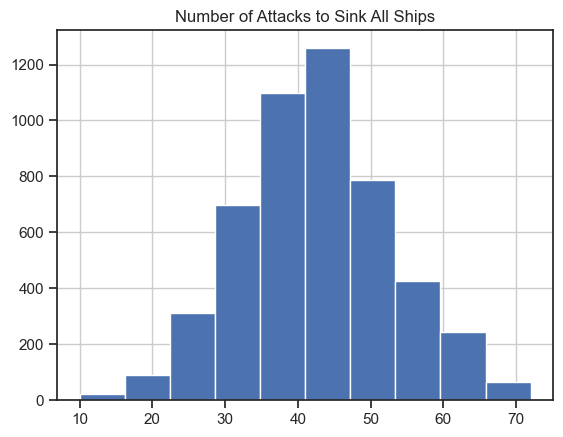

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('notebook')
sns.set_style('ticks')
results['num_attacks'].hist()
plt.title('Number of Attacks to Sink All Ships')
results['num_attacks'].mean()

In [38]:
results['board'][results['num_attacks'] >= 70]

521     [[Aircraft_Carrier, Aircraft_Carrier, Aircraft...
1041    [[None, None, None, None, None, None, None, No...
3652    [[None, Cruiser, Cruiser, Cruiser, None, None,...
4030    [[None, None, None, None, None, None, None, No...
4755    [[None, None, None, None, None, None, None, No...
Name: board, dtype: object